### build the SAM index

In [22]:
%matplotlib inline 

In [23]:
from matplotlib import pyplot as plt 

In [24]:
import sys
import pathlib

In [25]:
import numpy as np 
import pandas as pd 

In [26]:
url = "https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/aao/monthly.aao.index.b79.current.ascii.table"

In [27]:
sam = pd.read_table(url, sep=r"\s+") 

In [28]:
sam = sam.stack()

In [29]:
sam.index = pd.date_range(start='1979-01-31', freq='M', periods=len(sam))

In [30]:
sam = sam.to_frame(name='SAM')

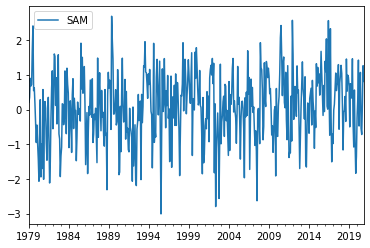

In [31]:
sam.plot()

In [33]:
sam.columns = ['SAM_monthly']

### calculate the seasonal anomalies 

In [34]:
sams = sam.rolling(window=3, min_periods=3).mean()

In [35]:
sams.columns = ['SAM_seasonal']

### concatenate 

In [36]:
sam = pd.concat([sam, sams], axis=1)

In [37]:
sam.head()

,SAM_monthly,SAM_seasonal
1979-01-31,0.209,NaN
1979-02-28,0.356,NaN
1979-03-31,0.899,0.488000
1979-04-30,0.678,0.644333
1979-05-31,0.724,0.767000


### saves to disk 

In [38]:
opath = pathlib.Path("/media/nicolasf/END19101/data/climate_indices/observed/SAM")

In [39]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [40]:
sam.index.name = 'date'

In [41]:
sam.to_csv(opath.joinpath("SAM.csv"))